In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../Data/Auto.csv")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [22]:
# 9a)

print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [23]:
# 9a)

# Identifiera kvantitativa kolumner, Hur mycket något är? 
quantitative = data.select_dtypes(include=["int64", "float64"]).columns

# Identifiera kvalitativa kolumner, Vilken typ och representerar kategorier eller egenskaper?
qualitative = data.select_dtypes(include=["object"]).columns

print(f"Kvantitavia kolumner: {quantitative}")
print(f"Kvalitativa kolumner: {qualitative}")


Kvantitavia kolumner: Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year',
       'origin'],
      dtype='object')
Kvalitativa kolumner: Index(['horsepower', 'name'], dtype='object')


In [24]:
# 9b) Vilket är intervallet för varje kvantitativ prediktor/förutsägelse?
for prediktor in quantitative:
    min_value = np.min(data[prediktor])
    max_value = np.max(data[prediktor])
    print(f"Intervallet för {prediktor}: min = {min_value}, max = {max_value}")


Intervallet för mpg: min = 9.0, max = 46.6
Intervallet för cylinders: min = 3, max = 8
Intervallet för displacement: min = 68.0, max = 455.0
Intervallet för weight: min = 1613, max = 5140
Intervallet för acceleration: min = 8.0, max = 24.8
Intervallet för year: min = 70, max = 82
Intervallet för origin: min = 1, max = 3


In [25]:
# 9c) Vad är medelvärdet och standardavvikelsen för varje kvantitativ prediktor/förutsägelse?
for prediction in quantitative:
    mean_value = np.mean(data[prediction])
    standard_avvikelse = np.std(data[prediction])
    print(f"Medelvärdet för {prediction}: {mean_value}")
    print(f"Standardavvikelsen för {prediction}: {standard_avvikelse}")


Medelvärdet för mpg: 23.51586901763224
Standardavvikelsen för mpg: 7.815941538224256
Medelvärdet för cylinders: 5.458438287153652
Standardavvikelsen för cylinders: 1.6994325855091355
Medelvärdet för displacement: 193.53274559193954
Standardavvikelsen för displacement: 104.24803997948834
Medelvärdet för weight: 2970.2619647355164
Standardavvikelsen för weight: 846.8355568478047
Medelvärdet för acceleration: 15.55566750629723
Standardavvikelsen för acceleration: 2.746529639056109
Medelvärdet för year: 75.99496221662469
Standardavvikelsen för year: 3.6853546098832237
Medelvärdet för origin: 1.5743073047858942
Standardavvikelsen för origin: 0.801538090863641


In [26]:
# 9d) Ta bort observationerna 10-85. Vad är intervallet, medelvärdet och standardavvikelsen för varje prediktor i den del av datat som återstår efter borttagningen?

data_delete = data.drop(data.index[9:85])
numeric_columns = data_delete.select_dtypes(include=["object"]).columns.to_list()

for column in numeric_columns:
    data_delete[column] = pd.to_numeric(data_delete[column], errors='coerce')

max_min_value = data_delete.max() - data_delete.min()
mean_value = data_delete.mean()
standard_avvikelse = data_delete.std()

print(f"Intervallet efter borttagning för:\n{max_min_value}")
print(f"Medelvärdet efter borttagning för:\n{mean_value}")
print(f"Standardavvikelsen efter borttagning för:\n{standard_avvikelse}")


Intervallet efter borttagning för:
mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
name               NaN
dtype: float64
Medelvärdet efter borttagning för:
mpg               24.438629
cylinders          5.370717
displacement     187.049844
horsepower       100.955836
weight          2933.962617
acceleration      15.723053
year              77.152648
origin             1.598131
name                    NaN
dtype: float64
Standardavvikelsen efter borttagning för:
mpg               7.908184
cylinders         1.653486
displacement     99.635385
horsepower       35.895567
weight          810.642938
acceleration      2.680514
year              3.111230
origin            0.816163
name                   NaN
dtype: float64


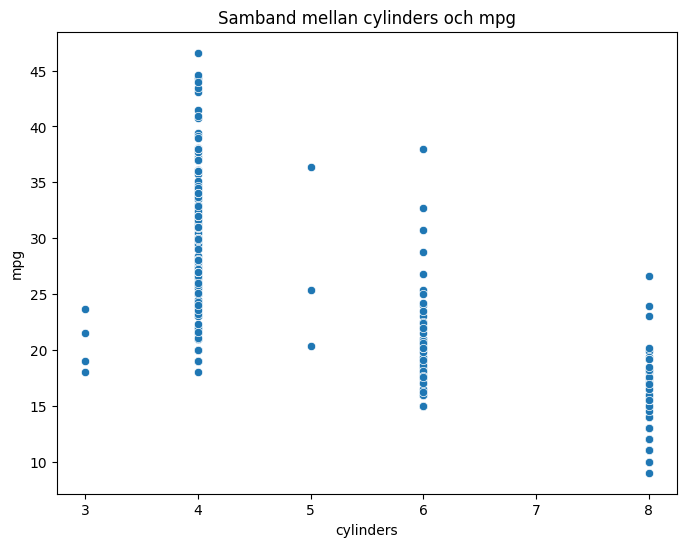

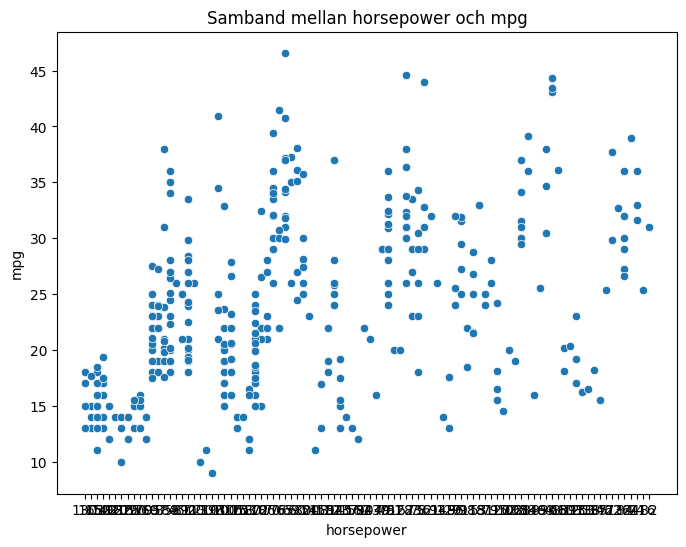

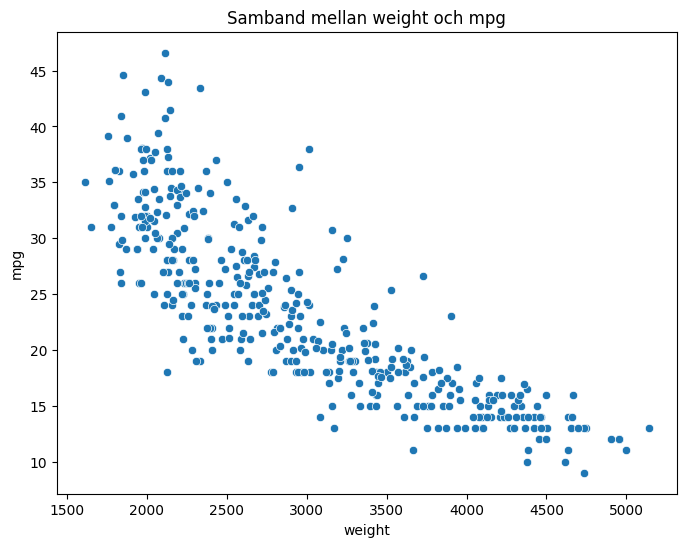

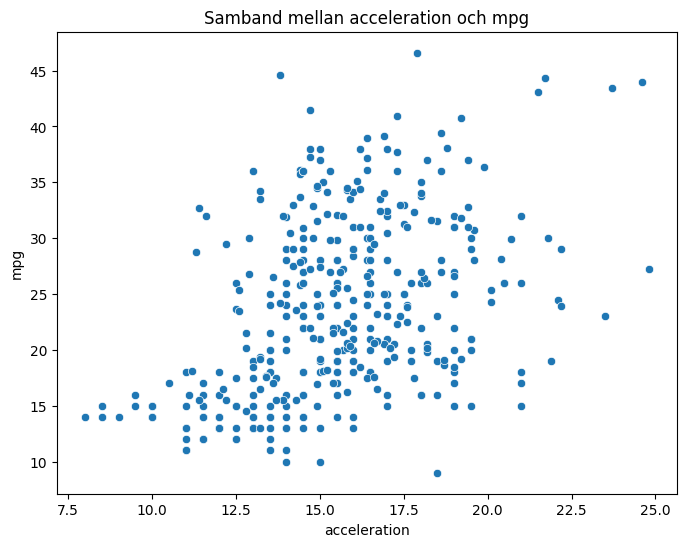

In [43]:
# 9e) Använd hela datamängden för att undersöka prediktorerna grafiskt, med hjälp av scatterplot m.m

prediktorer = ["mpg", "cylinders", "horsepower", "weight", "acceleration"]

for prediktor in prediktorer:
    if prediktor != "mpg":
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=prediktor, y='mpg', data=data)
        plt.title(f'Samband mellan {prediktor} och mpg')
        plt.show()


##### 9f) Anta att vi vill förutsäga miles per gallon (mpg) baserat på de andra variablerna. Tyder dina diagram på att någon av de andra variablerna kan vara användbar för att förutsäga mpg? Motivera ditt svar.